## YOLO Detection


In [ ]:
pip install --upgrade shapely

In [1]:
pip install ultralyticsplus==0.0.28 ultralytics==8.0.43


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.6/299.6 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.6/112.6 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.1/296.1 kB 12.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cuso

In [2]:
from ultralyticsplus import YOLO, render_result
import matplotlib.pyplot as plt
import cv2
import numpy as np

model = YOLO('foduucom/plant-leaf-detection-and-classification')
#set model parameters
model.overrides['conf'] = 0.25  # NMS confidence threshold
model.overrides['iou'] = 0.45  # NMS IoU threshold
model.overrides['agnostic_nms'] = False  # NMS class-agnostic
model.overrides['max_det'] = 1000  # maximum number of detections per image




/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/161 [00:00<?, ?B/s]

best.pt:   0%|          | 0.00/22.5M [00:00<?, ?B/s]

In [3]:
image = '/content/drive/MyDrive/Tom_test/tom3.jpg'
image=cv2.imread(image)

results = model.predict(image)


Ultralytics YOLOv8.0.43 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU
Model summary (fused): 168 layers, 11143386 parameters, 0 gradients, 28.5 GFLOPs

0: 352x640 2 tomatos, 716.6ms
Speed: 2.7ms preprocess, 716.6ms inference, 30.7ms postprocess per image at shape (1, 3, 640, 640)


In [4]:
flag=False
for result in results:
    for box in result.boxes:
        class_id = result.names[box.cls[0].item()]
        if (class_id == "no detections"):
            flag=True
            break

print(flag)

False


In [5]:

render = render_result(model=model, image=image, result=results[0])

render=np.array(render)
render.shape
cv2.imwrite("yolo.jpg",render)

True

# choose the the biggest box to crop

In [6]:
res_numpy=np.array(results[0].boxes.xywh)
no_res=len(res_numpy)
res=[w*h for x,y,w,h in (res_numpy)]
box_index=np.argmax(res)
box_index


1

In [7]:
res_box=np.array(results[0].boxes[box_index].xyxy)
res_box

array([[        235,         110,         418,         315]], dtype=float32)

In [8]:
x_min=int(res_box[0][0])
y_min=int(res_box[0][1])
x_max=int(res_box[0][2])
y_max=int(res_box[0][3])
box=(x_min,y_min,x_max,y_max)
box

(235, 110, 418, 315)

array([[[ 80, 149, 169],
        [ 82, 149, 170],
        [ 83, 150, 171],
        ...,
        [ 99, 166, 191],
        [102, 170, 193],
        [104, 172, 195]],

       [[ 83, 152, 172],
        [ 82, 151, 171],
        [ 84, 151, 172],
        ...,
        [ 99, 166, 191],
        [102, 170, 193],
        [104, 172, 195]],

       [[ 82, 150, 169],
        [ 83, 151, 170],
        [ 84, 153, 170],
        ...,
        [104, 171, 198],
        [103, 167, 202],
        [104, 168, 203]],

       ...,

       [[ 49,  93,  62],
        [ 49,  93,  62],
        [ 48,  92,  61],
        ...,
        [ 35, 118, 110],
        [ 35, 117, 105],
        [ 31, 113, 101]],

       [[ 49,  93,  62],
        [ 49,  93,  62],
        [ 48,  92,  61],
        ...,
        [ 35, 118, 110],
        [ 35, 117, 105],
        [ 31, 113, 101]],

       [[ 49,  93,  62],
        [ 49,  93,  62],
        [ 48,  92,  61],
        ...,
        [ 35, 118, 110],
        [ 35, 117, 105],
        [ 31, 113, 101]]], dtype=uint8)
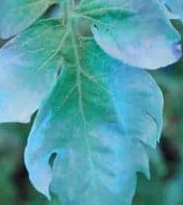

In [9]:

cropped_image = image[y_min:y_max, x_min:x_max]
cropped_image

In [10]:
cv2.imwrite("cropped_image.jpg",cropped_image)

True

## ready segmentaion

In [11]:

# Specify the path where you want to save the image in Google Drive
save_path = '/content/drive/MyDrive/Tom_test/output_image.jpg'

# Save the image using OpenCV
cv2.imwrite(save_path, cropped_image)

print(f"Image saved to {save_path}")


Image saved to /content/drive/MyDrive/Tom_test/output_image.jpg


In [ ]:
import os
from imutils import paths
import imageio

import numpy as np
from tqdm import tqdm
import cv2
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

from model import ResNetUNet
from utility import reverse_transform, reverse_transform_mask
#from utilities import reverse_transform, reverse_transform_mask
#from preprocess import check_dir
from generate_dataset import check_dir

WEIGHT_PATH = "/content/drive/MyDrive/Segmentation"
USE_BEST_VAL = True
DISPLAY_PLOTS = False
TEST_DIR = "/content/drive/MyDrive/Tom_test"
SAVE_PATH = "/content/drive/MyDrive/Tom_test"
PREFIX = "seg_"

trans = transforms.Compose([
    transforms.ToTensor()
])


class parseTestset(Dataset):
    def __init__(self, img_paths, transform=None):
        self.img_paths = img_paths
        self.transform = transform

    def __len__(self):
        return len(self.img_paths)

    def __getitem__(self, idx):
        image_path = self.img_paths[idx]
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))

        _, filename = os.path.split(image_path)

        if self.transform:
            image = self.transform(image)  # ToTensor
            image = transforms.Normalize(  # TODO: remove this?
                [0.485, 0.456, 0.406],
                [0.229, 0.224, 0.225])(image)
        return image, filename


if __name__ == "__main__":
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(f'running on: {device}')

    num_class = 1
    model = ResNetUNet(num_class).to(device)

#model.load_state_dict(torch.load(model_path))


    if USE_BEST_VAL:
        model.load_state_dict(torch.load(
            (os.path.join(WEIGHT_PATH, "best_val_weights.pth")), map_location=torch.device('cpu')))
    else:
        model.load_state_dict(torch.load(
            (os.path.join(WEIGHT_PATH, "latest_weights.pth")),map_location=torch.device('cpu')))
##############
    test_img_paths = list(paths.list_images(TEST_DIR))
    print(f'found {len(test_img_paths)} images')

    # small batch_size if you are testing on 1 or 2 images
    b_size = min(25, len(test_img_paths))

    test_set = parseTestset(test_img_paths, transform=trans)
    test_loader = DataLoader(test_set, batch_size=b_size,
                             shuffle=True, num_workers=0)

    check_dir(SAVE_PATH)

    model.eval()
    for i, batch_pair in enumerate(tqdm(test_loader)):
        img_batch = batch_pair[0].to(device)
        img_names = batch_pair[1]

        seg_batch = model(img_batch)
        seg_batch = torch.sigmoid(seg_batch)
        for img, seg, filename in zip(img_batch, seg_batch, img_names):
            seg_np = seg.cpu().detach()
            seg_np = reverse_transform_mask(seg_np)
            seg_np = np.where(seg_np > 220, 1, 0)

            img_np = img.cpu()
            img_np = reverse_transform(img_np)
            prod_img = np.multiply(seg_np, img_np).astype("uint8")

            if len(PREFIX) > 0:
                filename = PREFIX + filename

            savename = os.path.join(SAVE_PATH, filename)
            imageio.imwrite(savename, prod_img)

## Classification model

In [20]:
import tensorflow as tf


In [21]:
masked_image=cv2.imread('/content/drive/MyDrive/Tom_test/seg_output_image.jpg')

In [22]:
masked_image=cv2.resize(masked_image,(224,224))
#masked_image=cv2.resize(cropped_image,(224,224))
masked_image=np.array(masked_image)
masked_image = np.expand_dims(masked_image, axis=0)

In [23]:
loaded_model_class = tf.keras.models.load_model('/content/drive/MyDrive/classification_model (1).h5')

In [24]:



y_pred = loaded_model_class.predict(masked_image)
y_pred = np.argmax(y_pred,axis=1)
disease_names = {
                0: "Bacterial Spot",
                1: "Early Blight",
                2: "Late Blight",
                3: "Leaf Mold",
                4: "Septoria Leaf Spot",
                5: "Spider Mites",
                6: "Target Spot",
                7: "Yellow Leaf Curl Virus",
                8: "Mosaic Virus",
                9: "healthy"
            }


1/1 [==============================] - 1s 988ms/step


In [25]:
disease_names[y_pred[0]]

'Late Blight'